In [4]:
df <- read.csv("test_data/gene_batch_search.csv")
df

X,Variant.ID,Gene,Consequence,Annotation,Flags,Allele.Count,Allele.Number,Allele.Frequency,Number.of.Homozygotes,⋯,Amish,Latino,Ashkenazi.Jewish,East.Asian,European..Finnish.,European..non.Finnish.,Other,South.Asian,Middle.Eastern,Number.of.Hemizygotes
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4-987010-C-G,IDUA,c.-75C>G,5_prime_UTR_variant,[],1,149172,6.703671e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,1.486945e-05,0.0000000000,0,0.000000000,NA
1,4-987013-G-A,IDUA,c.-72G>A,5_prime_UTR_variant,[],3,151256,1.983392e-05,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,9.606148e-05,2.949070e-05,0.0000000000,0,0.000000000,NA
2,4-987014-C-T,IDUA,c.-71C>T,5_prime_UTR_variant,[],37,152092,2.432738e-04,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,1.884304e-04,4.411505e-04,0.0004780115,0,0.000000000,NA
3,4-987021-T-C,IDUA,c.-64T>C,5_prime_UTR_variant,[],2,146758,1.362788e-05,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,2.992847e-05,0.0000000000,0,0.000000000,NA
4,4-987023-C-G,IDUA,c.-62C>G,5_prime_UTR_variant,[],1,152126,6.573498e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA
5,4-987023-C-T,IDUA,c.-62C>T,5_prime_UTR_variant,[],1,152126,6.573498e-06,0,⋯,0,6.543646e-05,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA
6,4-987026-C-T,IDUA,c.-59C>T,5_prime_UTR_variant,[],2,152122,1.314734e-05,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA
7,4-987027-C-G,IDUA,c.-58C>G,5_prime_UTR_variant,[],1,152154,6.572289e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,1.470415e-05,0.0000000000,0,0.000000000,NA
8,4-987027-C-A,IDUA,c.-58C>A,5_prime_UTR_variant,[],1,152154,6.572289e-06,0,⋯,0,0.000000e+00,0.000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,0,0.000000000,NA


In [95]:
get_reoordered_df <- function(df){
    col_idx_homo <- grep("Number.of.Homozygotes", names(df))
    col_idx_hemi <- grep("Number.of.Hemizygotes", names(df))
    col_len <- length(names(df))
    
    return(df[, c(1:col_idx_homo,col_idx_hemi,(col_idx_homo+1):col_len)[-col_idx_hemi-1]])
}



get_pop_dfs <- function(df=NULL, freq_threshold=0.001){
    
    col_idx_alternative <- grep("Alternative", names(df))
    population_indexes <- c((col_idx_alternative+1):length(names(df)))
    
    populations_dfs <- c()
    i <- 1
    for (pop_idx in population_indexes){
        df_temp <- df[, c(1:col_idx_alternative,pop_idx)]
        populations_dfs[[i]] <- df_temp[df_temp[,ncol(df_temp)] > freq_threshold, ]
        i <- i + 1
    }
    
    return(populations_dfs)
}


get_pop_var_lists <- function(populations_dfs=NULL){
    
    pop_var_lists <- list()
    pop_names <- c()
    i <- 1
    for (pop in populations_dfs){
        
        pop_names[i] <- names(pop)[length(names(pop))]
        pop_var_lists[[i]] <- c(pop[,"Variant.ID"])
        i <- i+1
    }
    
    names(pop_var_lists) <- pop_names
    return(pop_var_lists)
}


keep_singles <- function(v){
  v[!(v %in% v[duplicated(v)])] 
}


get_number_of_vars <- function(pop_var_lists=NULL){
    all_vars <- unname(unlist(pop_var_lists, recursive = FALSE))
    unique <- keep_singles(all_vars)
    return(length(unique))
}

In [143]:
df <- get_reoordered_df(df)
pop_dfs <- get_pop_dfs(df)
pops_vars <- get_pop_var_lists(pop_dfs)
num_unique_vars <- get_number_of_vars(pops_vars)

In [137]:
current <- unname(pops_vars[5])[[1]]
all_others <- unlist(unname(pops_vars[c(1:length(pops_vars))[-5]]))

In [146]:
num_total <- length(current)
num_common <- length(intersect(current,all_others))
num_private <- num_total-num_common 

In [140]:
print(num_common)
print(num_private)

[1] 52
[1] 26


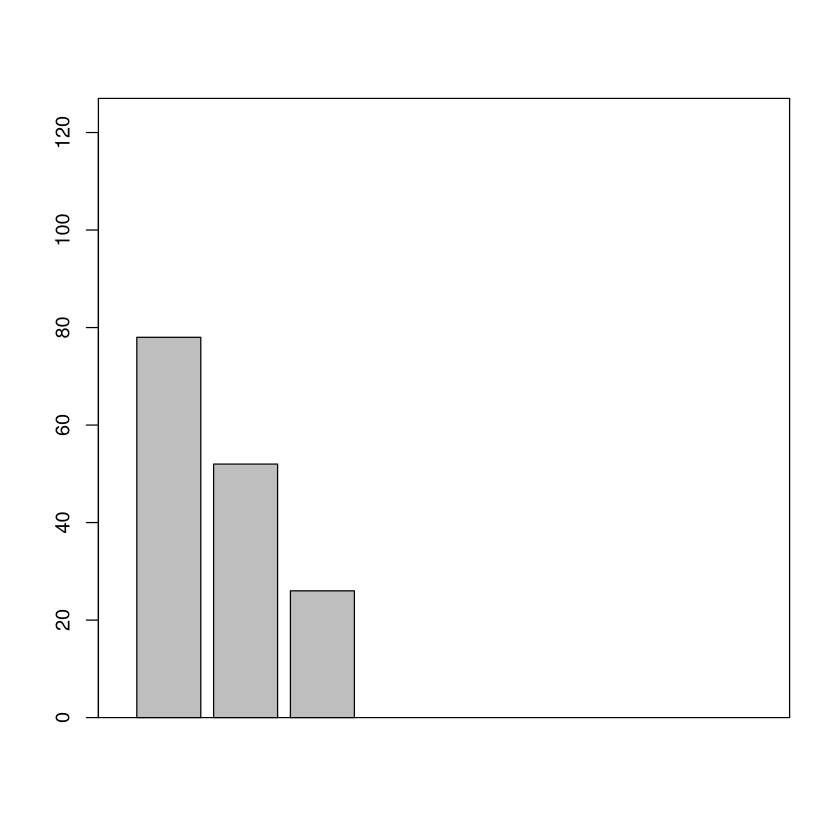

In [152]:
b<-barplot(c(num_total, num_common, num_private), ylim=c(0,num_unique_vars), xlim = c(0, 1), width = 0.1)
box()